<a href="https://colab.research.google.com/github/LGabrielsp/NeuronSetosa/blob/master/UmNeuronSetosa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Código de uma rede neural de um neurônio

### Importamos as bibliotecas pandas, numpy e matplotlib e módulo datasets do sklearn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

# Criamos uma variável com o Bunch dos dados iris dataset

In [ ]:
DF = datasets.load_iris()

# Mostrando que DF é um Bunch (uma estrutura de dados do sklearn similar ao dicionario)

In [ ]:
type(DF)

sklearn.utils.Bunch

## DF.keys mostra as chaves dentro do dicionario que foi chamado

In [ ]:
DF.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### DF['data'] mostra os dados dentro da chave data

In [ ]:
DF['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### Nesta célula, são chamado os dados 

In [ ]:
DF_iris = pd.DataFrame(DF.data, columns=['SL', 'SW', 'PL', 'PW' ])
DF_iris['E'] = pd.Series(DF.target)
DF_iris['E'].unique()
DF_iris_new = DF_iris.replace({'E':{0 : 1.0, 1 : -1.0, 2 : -1.0}})
DF_iris_new['E']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
145   -1.0
146   -1.0
147   -1.0
148   -1.0
149   -1.0
Name: E, Length: 150, dtype: float64

In [ ]:
DF_iris_new

,SL,SW,PL,PW,E
0,5.1,3.5,1.4,0.2,1.0
1,4.9,3.0,1.4,0.2,1.0
2,4.7,3.2,1.3,0.2,1.0
3,4.6,3.1,1.5,0.2,1.0
4,5.0,3.6,1.4,0.2,1.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,-1.0
146,6.3,2.5,5.0,1.9,-1.0
147,6.5,3.0,5.2,2.0,-1.0
148,6.2,3.4,5.4,2.3,-1.0


In [ ]:
DF_iris['E'].unique()

array([0, 1, 2])

In [ ]:
type(DF_iris['E'])

pandas.core.series.Series

## Mostrando que os dados não estão balanceados. Ou seja, são 100 exemplos de não-setosa contra 50 de setosa

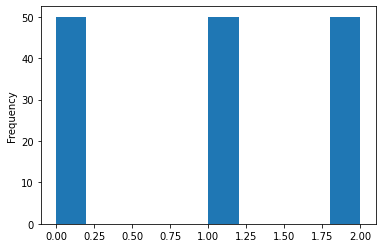

In [ ]:
DF_iris['E'].plot( kind = 'hist')

## O gráfico acima mostra a frequência antes da correção de dados

## Na célula abaixo é mostrado como fazer o balaceamento ao duplicar os dados de setosa

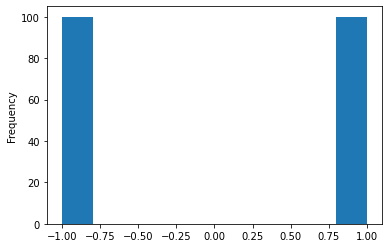

In [ ]:
DF_iris_new = pd.concat([DF_iris_new.iloc[:50],DF_iris_new], ignore_index = True)
DF_iris_new['E'].plot( kind = 'hist')

## O gráfico acima mostra a frequência após correção de dados.

## Nestas células serão feitas as divisões para treino e teste.

In [ ]:
X = DF_iris_new.drop('E',axis=1).values
y = DF_iris_new['E'].values

In [ ]:
len(y), len(X)

(200, 200)

In [ ]:
type(y)

numpy.ndarray

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=78)


## Os dados, agora, estão balanceados, a porcentagem dos dados são de 49% e 51%, aproximadamente.

In [ ]:
cont  = np.unique(y_train,return_counts = True)
cont[1][0]/cont[1].sum(), cont[1][1]/cont[1].sum()

(0.5111111111111111, 0.4888888888888889)

## São 180 exemplos para o treinamento.

In [ ]:
cont[1].sum()

180

## São 20 exemplos para o teste.

In [ ]:
cont_test = np.unique(y_test, return_counts = True)
cont_test[1].sum(), cont_test

(20, (array([-1.,  1.]), array([ 8, 12])))

## Pesos e bias inicial.

## O mesmo utilizado no código com pytorch.

In [ ]:
pesos = np.array([[ 0.3757, -0.2279, -0.0859,  0.2857]])
pesos

array([[ 0.3757, -0.2279, -0.0859,  0.2857]])

In [ ]:
bias = np.array([[-0.3870]])
bias

array([[-0.387]])

## Função neurônio.

In [ ]:
def neuronio(x, w, b):
    z = np.dot(w,x.T) + b
    return np.tanh(z)

## Função erro (cost function).

In [ ]:
def cost(x,y,w,b):
    return (np.power((neuronio(x,w,b)-y),2)/2.0).mean() 

In [ ]:

(np.abs(y_test.reshape(1,-1) - neuronio(X_test,pesos,bias)) <= 1.0).sum()

12

## Função acerto.

In [ ]:
def acerto(x,y,w,b):
    dif = np.abs(y.reshape(1,-1) - neuronio(x,w,b))
    return (dif <= 1.0).sum()

In [ ]:
acerto(X_test, y_test, pesos, bias)

12

## Calculando delta.

In [ ]:
def delta(x, y, w, b):
    z = np.dot(w,x.T) + b
    return (1.0 - np.tanh(z)**2.0)*(np.tanh(z)-y)

## Verificando se os shapes estão ok.

In [ ]:
X_train.shape, pesos.shape, bias.shape

((180, 4), (1, 4), (1, 1))

In [ ]:
dC_db = delta(X_train,y_train,pesos,bias).mean()
dC_db

0.09210809014805971

In [ ]:
dC_dw = X_train * delta(X_train,y_train,pesos,bias).T

In [ ]:
dC_dw.shape

(180, 4)

In [ ]:
dC_dw = dC_dw.mean(axis=0)

In [ ]:
dC_dw

array([0.70774513, 0.17663459, 0.8791528 , 0.32894605])

In [ ]:
type(dC_dw)

numpy.ndarray

In [ ]:
epocas = 50
eta = 0.01
erros = []
accur = []
for i in range(epocas):

    pesos =  pesos - eta * dC_dw
    bias = bias - eta * dC_db
    
    accur.append(acerto(X_test, y_test, pesos, bias)/20.)
    erros.append(cost(X_train,y_train,pesos,bias))
    dC_db = np.zeros(dC_db.shape)
    dC_dw = np.zeros(dC_dw.shape)
    dC_db = delta(X_train,y_train,pesos,bias).mean()
    dC_dw = (X_train * delta(X_train,y_train,pesos,bias).T).mean(axis = 0)
    
    
    

## Demostrando a precisão.

In [ ]:
accuracy = [0.6,0.6,0.6,0.6,0.65,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,
            1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,
            1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]

## Demostrando os valores de perda.

In [ ]:
losses = [1.8724578619003296,
 1.8060956001281738,
 1.6836249828338623,
 1.4497419595718384,
 1.1368271112442017,
 0.9966248273849487,
 0.9103770852088928,
 0.8311571478843689,
 0.7594887018203735,
 0.6953334212303162,
 0.638281524181366,
 0.587727427482605,
 0.542989194393158,
 0.5033828020095825,
 0.4682649075984955,
 0.437052458524704,
 0.4092298746109009,
 0.38434818387031555,
 0.362019807100296,
 0.3419124186038971,
 0.32374143600463867,
 0.3072637617588043,
 0.29227128624916077,
 0.27858591079711914,
 0.2660546898841858,
 0.2545461058616638,
 0.24394656717777252,
 0.23415780067443848,
 0.2250944823026657,
 0.21668222546577454,
 0.20885612070560455,
 0.20155927538871765,
 0.19474159181118011,
 0.188358873128891,
 0.1823720484972,
 0.1767464578151703,
 0.17145125567913055,
 0.1664588302373886,
 0.16174457967281342,
 0.1572864055633545,
 0.15306444466114044,
 0.14906080067157745,
 0.14525926113128662,
 0.1416451781988144,
 0.13820523023605347,
 0.13492736220359802,
 0.1318005919456482,
 0.12881481647491455,
 0.1259608268737793,
 0.12323027849197388]

## Os gráficos abaixo são uma comparação entre os códigos Numpy e Pytorch

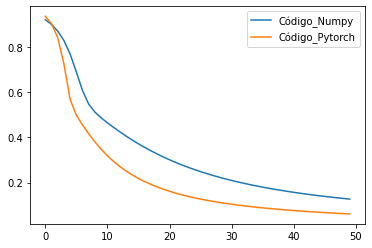

In [ ]:
x1 = x2 = range(epocas)
y1 = erros
y2 = np.array(losses)/2.
plt.plot(x1, y1, label = 'Código_Numpy')
plt.plot(x2, y2, label = 'Código_Pytorch')
plt.legend()

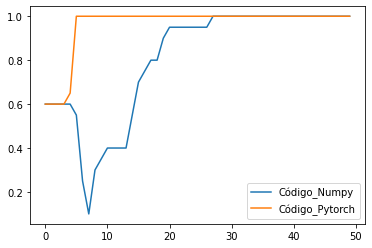

In [ ]:
z1 = accur
z2 = accuracy
plt.plot(x1, z1, label = 'Código_Numpy')
plt.plot(x2, z2, label = 'Código_Pytorch')
plt.legend()